# 第6章 文本摘要

In [1]:
pip install datasets

Note: you may need to restart the kernel to use updated packages.


In [2]:
from datasets import load_dataset 
dataset = load_dataset('ccdv/cnn_dailymail', '3.0.0')
print(f"Features: {dataset['train'].column_names}") 

Extracting data files:   0%|          | 0/5 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset cnn_dailymail downloaded and prepared to /root/.cache/huggingface/datasets/ccdv___cnn_dailymail/3.0.0/3.0.0/0107f7388b5c6fae455a5661bcd134fc22da53ea75852027040d8d1e997f101f. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Features: ['article', 'highlights', 'id']


In [3]:
sample = dataset["train"][1] 
print(f""" Article (excerpt of 500 characters, total length: {len(sample["article"])}): """) 
print(sample["article"][:500]) 
print(f'\nSummary (length: {len(sample["highlights"])}):')
print(sample["highlights"])

 Article (excerpt of 500 characters, total length: 3192): 
(CNN) -- Usain Bolt rounded off the world championships Sunday by claiming his third gold in Moscow as he anchored Jamaica to victory in the men's 4x100m relay. The fastest man in the world charged clear of United States rival Justin Gatlin as the Jamaican quartet of Nesta Carter, Kemar Bailey-Cole, Nickel Ashmeade and Bolt won in 37.36 seconds. The U.S finished second in 37.56 seconds with Canada taking the bronze after Britain were disqualified for a faulty handover. The 26-year-old Bolt has n

Summary (length: 180):
Usain Bolt wins third gold of world championship .
Anchors Jamaica to 4x100m relay victory .
Eighth gold at the championships for Bolt .
Jamaica double up in women's 4x100m relay .


In [4]:
sample_text = dataset["train"][1]["article"][:2000] 
# We'll collect the generated summaries of each model in a dictionary 
summaries = {}

In [6]:
import nltk 
from nltk.tokenize import sent_tokenize
nltk.download("punkt") 
string = "The U.S. are a country. The U.N. is an organization." 
sent_tokenize(string)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['The U.S. are a country.', 'The U.N. is an organization.']

In [7]:
def three_sentence_summary(text): 
	return "\n".join(sent_tokenize(text)[:3]) 
summaries["baseline"] = three_sentence_summary(sample_text)

In [8]:
from transformers import pipeline, set_seed 
set_seed(42) 
pipe = pipeline("text-generation", model="gpt2-xl") 
gpt2_query = sample_text + "\nTL;DR:\n" 
pipe_out = pipe(gpt2_query, max_length=512, clean_up_tokenization_spaces=True)

summaries["gpt2"] = "\n".join( sent_tokenize(pipe_out[0]["generated_text"][len(gpt2_query) :]))


2024-02-29 03:38:42.098837: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 03:38:42.098984: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 03:38:42.267194: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


config.json:   0%|          | 0.00/689 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/6.43G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


In [9]:
pipe = pipeline("summarization", model="t5-large") 
pipe_out = pipe(sample_text) 
summaries["t5"] = "\n".join(sent_tokenize(pipe_out[0]["summary_text"]))

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.95G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

In [10]:
pipe = pipeline("summarization", model="facebook/bart-large-cnn") 
pipe_out = pipe(sample_text) 
summaries["bart"] = "\n".join(sent_tokenize(pipe_out[0]["summary_text"]))

config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [11]:
pipe = pipeline("summarization", model="google/pegasus-cnn_dailymail") 
pipe_out = pipe(sample_text) 
summaries["pegasus"] = pipe_out[0]["summary_text"].replace(" .<n>", ".\n")

config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/280 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/88.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

In [12]:
print("GROUND TRUTH") 
print(dataset["train"][1]["highlights"]) 
print("") 
for model_name in summaries: 
	print(model_name.upper()) 
	print(summaries[model_name]) 
	print("")

GROUND TRUTH
Usain Bolt wins third gold of world championship .
Anchors Jamaica to 4x100m relay victory .
Eighth gold at the championships for Bolt .
Jamaica double up in women's 4x100m relay .

BASELINE
(CNN) -- Usain Bolt rounded off the world championships Sunday by claiming his third gold in Moscow as he anchored Jamaica to victory in the men's 4x100m relay.
The fastest man in the world charged clear of United States rival Justin Gatlin as the Jamaican quartet of Nesta Carter, Kemar Bailey-Cole, Nickel Ashmeade and Bolt won in 37.36 seconds.
The U.S finished second in 37.56 seconds with Canada taking the bronze after Britain were disqualified for a faulty handover.

GPT2
Bolt finished in style by winning the final sprint event in Moscow.
There is still a few sprint events to go before Friday's final but so far this final gold should stand as a world record.

T5
usain bolt wins his third gold medal of the world championships in the men's 4x100m relay .
the 26-year-old anchored Jamai

In [14]:
!pip install sacrebleu
from datasets import load_metric 
bleu_metric = load_metric("sacrebleu")
import pandas as pd 
import numpy as np 
bleu_metric.add( prediction="the the the the the the", reference=["the cat is on the mat"]) 
results = bleu_metric.compute(smooth_method="floor", smooth_value=0) 
results["precisions"] = [np.round(p, 2) for p in results["precisions"]] 
pd.DataFrame.from_dict(results, orient="index", columns=["Value"])

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.4/57.4 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 5.5 MB/s eta 0:00:00


,Value
score,0.0
counts,"[2, 0, 0, 0]"
totals,"[6, 5, 4, 3]"
precisions,"[33.33, 0.0, 0.0, 0.0]"
bp,1.0
sys_len,6
ref_len,6


In [15]:
bleu_metric.add( prediction="the cat is on mat", reference=["the cat is on the mat"])
results = bleu_metric.compute(smooth_method="floor", smooth_value=0) 
results["precisions"] = [np.round(p, 2)for p in results["precisions"]] 
pd.DataFrame.from_dict(results, orient="index", columns=["Value"])

,Value
score,57.893007
counts,"[5, 3, 2, 1]"
totals,"[5, 4, 3, 2]"
precisions,"[100.0, 75.0, 66.67, 50.0]"
bp,0.818731
sys_len,5
ref_len,6


In [17]:
!pip install rouge_score
rouge_metric = load_metric("rouge")
reference = dataset["train"][1]["highlights"] 
records = [] 
rouge_names = ["rouge1", "rouge2", "rougeL", "rougeLsum"] 
for model_name in summaries: 
	rouge_metric.add(prediction=summaries[model_name], reference=reference) 
	score = rouge_metric.compute() 
	rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names)
	records.append(rouge_dict) 
pd.DataFrame.from_records(records, index=summaries.keys())

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=418a2acefc9f933eb421bcf0fa2c219c0e56d6c2934107980665978598c3ca18
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


,rouge1,rouge2,rougeL,rougeLsum
baseline,0.303571,0.090909,0.214286,0.232143
gpt2,0.212121,0.000000,0.121212,0.212121
t5,0.486486,0.222222,0.378378,0.486486
bart,0.582278,0.207792,0.455696,0.506329
pegasus,0.866667,0.655172,0.800000,0.833333


In [18]:
def evaluate_summaries_baseline(dataset, metric, column_text="article", 			column_summary="highlights"): 
    summaries = [three_sentence_summary(text) for text in dataset[column_text]] 
    metric.add_batch(predictions=summaries, references=dataset[column_summary]) 
    score = metric.compute() 
    return score

In [21]:
test_sampled = dataset["test"].shuffle(seed=42).select(range(1000)) 
score = evaluate_summaries_baseline(test_sampled, rouge_metric) 
rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names) 
pd.DataFrame.from_dict(rouge_dict, orient="index", columns=["baseline"]).T


,rouge1,rouge2,rougeL,rougeLsum
baseline,0.388071,0.170554,0.247146,0.354972


In [25]:
from tqdm import tqdm 
import torch 
device = "cuda" if torch.cuda.is_available() else "cpu" 
def chunks(list_of_elements, batch_size):  
    """Yield successive batch-sized chunks from list_of_elements."""  
    for i in range(0, len(list_of_elements), batch_size):  
        yield list_of_elements[i:i + batch_size]
def evaluate_summaries_pegasus(dataset, metric, model, tokenizer, batch_size=16, device=device, column_text="article", column_summary="highlights"): 
	article_batches = list(chunks(dataset[column_text], batch_size)) 
	target_batches = list(chunks(dataset[column_summary], batch_size)) 
	for article_batch, target_batch in tqdm( zip(article_batches, target_batches), total=len(article_batches)): 
		inputs = tokenizer(article_batch, max_length=1024, truncation=True, padding="max_length", return_tensors="pt") 
		summaries = model.generate(input_ids=inputs["input_ids"].to(device), attention_mask=inputs["attention_mask"].to(device), length_penalty=0.8, num_beams=8, max_length=128) 
		decoded_summaries = [tokenizer.decode(s, skip_special_tokens=True, clean_up_tokenization_spaces=True) for s in summaries] 
		decoded_summaries = [d.replace("<n>", " ") for d in decoded_summaries] 
		metric.add_batch(predictions=decoded_summaries, references=target_batch) 
	score = metric.compute() 
	return score

In [26]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer 
model_ckpt = "google/pegasus-cnn_dailymail" 
tokenizer = AutoTokenizer.from_pretrained(model_ckpt) 
model = AutoModelForSeq2SeqLM.from_pretrained(model_ckpt).to(device) 
score = evaluate_summaries_pegasus(test_sampled, rouge_metric, model, tokenizer, batch_size=8) 
rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names) 
pd.DataFrame(rouge_dict, index=["pegasus"])

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-cnn_dailymail and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 125/125 [24:07<00:00, 11.58s/it]


,rouge1,rouge2,rougeL,rougeLsum
pegasus,0.427195,0.207378,0.305054,0.36919


In [28]:
!pip install py7zr
from datasets import load_dataset
dataset_samsum = load_dataset("samsum") 
split_lengths = [len(dataset_samsum[split])for split in dataset_samsum] 
print(f"Split lengths: {split_lengths}") 
print(f"Features: {dataset_samsum['train'].column_names}") 
print("\nDialogue:") 
print(dataset_samsum["test"][0]["dialogue"]) 
print("\nSummary:") 
print(dataset_samsum["test"][0]["summary"])

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 42.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 23.3 MB/s eta 0:00:00
  Attempting uninstall: brotli
    Found existing installation: Brotli 1.0.9
    Uninstalling Brotli-1.0.9:
      Successfully uninstalled Brotli-1.0.9


Generating train split:   0%|          | 0/14732 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/819 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/818 [00:00<?, ? examples/s]

Dataset samsum downloaded and prepared to /root/.cache/huggingface/datasets/samsum/samsum/0.0.0/3f7dba43be72ab10ca66a2e0f8547b3590e96c2bd9f2cbb1f6bb1ec1f1488ba6. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Split lengths: [14732, 819, 818]
Features: ['id', 'dialogue', 'summary']

Dialogue:
Hannah: Hey, do you have Betty's number?
Amanda: Lemme check
Hannah: <file_gif>
Amanda: Sorry, can't find it.
Amanda: Ask Larry
Amanda: He called her last time we were at the park together
Hannah: I don't know him well
Hannah: <file_gif>
Amanda: Don't be shy, he's very nice
Hannah: If you say so..
Hannah: I'd rather you texted him
Amanda: Just text him 🙂
Hannah: Urgh.. Alright
Hannah: Bye
Amanda: Bye bye

Summary:
Hannah needs Betty's number but Amanda doesn't have it. She needs to contact Larry.


In [29]:
pipe_out = pipe(dataset_samsum["test"][0]["dialogue"]) 
print("Summary:") 
print(pipe_out[0]["summary_text"].replace(" .<n>", ".\n")) 

Your max_length is set to 128, but your input_length is only 122. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=61)


Summary:
Amanda: Ask Larry Amanda: He called her last time we were at the park together.
Hannah: I'd rather you texted him.
Amanda: Just text him .


In [30]:
score = evaluate_summaries_pegasus(dataset_samsum["test"], rouge_metric, model, tokenizer, column_text="dialogue", column_summary="summary", batch_size=8) 
rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names) 
pd.DataFrame(rouge_dict, index=["pegasus"])

100%|██████████| 103/103 [17:59<00:00, 10.48s/it]


,rouge1,rouge2,rougeL,rougeLsum
pegasus,0.296091,0.087493,0.229237,0.229642


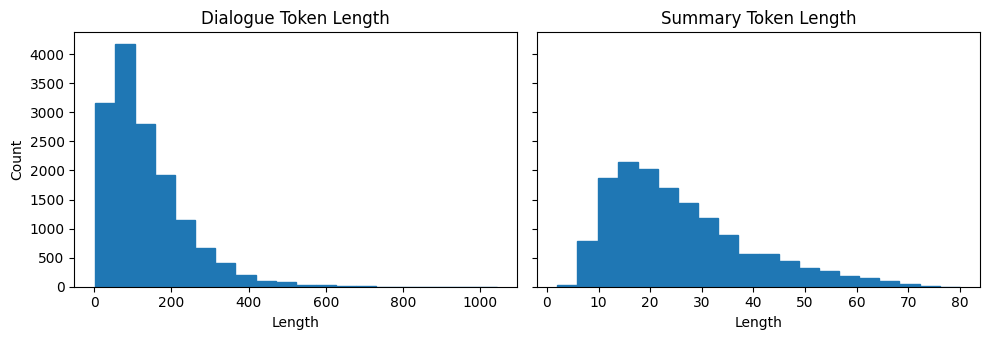

In [33]:
import matplotlib.pyplot as plt
d_len = [len(tokenizer.encode(s)) for s in dataset_samsum["train"] ["dialogue"]] 
s_len = [len(tokenizer.encode(s)) for s in dataset_samsum["train"]["summary"]] 
fig, axes = plt.subplots(1, 2, figsize=(10, 3.5), sharey=True)
axes[0].hist(d_len, bins=20, color="C0", edgecolor="C0") 
axes[0].set_title("Dialogue Token Length") 
axes[0].set_xlabel("Length") 
axes[0].set_ylabel("Count") 
axes[1].hist(s_len, bins=20, color="C0", edgecolor="C0") 
axes[1].set_title("Summary Token Length") 
axes[1].set_xlabel("Length") 
plt.tight_layout() 
plt.show()

In [ ]:
def convert_examples_to_features(example_batch): 
	input_encodings = tokenizer(example_batch["dialogue"], max_length=1024, truncation=True) 
	with tokenizer.as_target_tokenizer(): 
		target_encodings = tokenizer(example_batch["summary"], max_length=128, truncation=True) 
	return {"input_ids": input_encodings["input_ids"], "attention_mask": input_encodings["attention_mask"], "labels": target_encodings["input_ids"]} 
dataset_samsum_pt = dataset_samsum.map(convert_examples_to_features, batched=True) 
columns = ["input_ids", "labels", "attention_mask"] 
dataset_samsum_pt.set_format(type="torch", columns=columns)


In [ ]:
from transformers import DataCollatorForSeq2Seq 
seq2seq_data_collator = DataCollatorForSeq2Seq(tokenizer, model=model) 
#然后，像往常一样，我们为训练设置了一个TrainingArguments:
from transformers import TrainingArguments, Trainer 
training_args = TrainingArguments( output_dir='pegasus-samsum', num_train_epochs=1, warmup_steps=500, per_device_train_batch_size=1, per_device_eval_batch_size=1, weight_decay=0.01, logging_steps=10, push_to_hub=True,
evaluation_strategy='steps', eval_steps=500, save_steps=1e6, gradient_accumulation_steps=16)

In [ ]:
trainer = Trainer(model=model, args=training_args, tokenizer=tokenizer, data_collator=seq2seq_data_collator, train_dataset=dataset_samsum_pt["train"], eval_dataset=dataset_samsum_pt["validation"])

In [ ]:
trainer.train() 
score = evaluate_summaries_pegasus( dataset_samsum["test"], rouge_metric, trainer.model, tokenizer, batch_size=2, column_text="dialogue", column_summary="summary") 
rouge_dict = dict((rn, score[rn].mid.fmeasure) for rn in rouge_names) pd.DataFrame(rouge_dict, index=[f"pegasus"])

In [ ]:
gen_kwargs = {"length_penalty": 0.8, "num_beams":8, "max_length": 128} 
sample_text = dataset_samsum["test"][0]["dialogue"] 
reference = dataset_samsum["test"][0]["summary"] 
pipe = pipeline("summarization", model="transformersbook/pegasus-samsum") print("Dialogue:") 
print(sample_text) 
print("\nReference Summary:") 
print(reference) 
print("\nModel Summary:") 
print(pipe(sample_text, **gen_kwargs)[0]["summary_text"])

In [34]:
import pandas as pd 
dataset_url = "https://git.io/nlp-with-transformers" 
df_issues = pd.read_json(dataset_url, lines=True) 
print(f"DataFrame shape: {df_issues.shape}") 

DataFrame shape: (9930, 26)


In [35]:
cols = ["url", "id", "title", "user", "labels", "state", "created_at", "body"] 

df_issues.loc[2, cols].to_frame()


,2
url,https://api.github.com/repos/huggingface/trans...
id,849529761
title,[DeepSpeed] ZeRO stage 3 integration: getting ...
user,"{'login': 'stas00', 'id': 10676103, 'node_id':..."
labels,"[{'id': 2659267025, 'node_id': 'MDU6TGFiZWwyNj..."
state,open
created_at,2021-04-02 23:40:42
body,"**[This is not yet alive, preparing for the re..."


# 第７章 问答系统

In [1]:
!pip install datasets
!pip install transformers[torch]
!pip install accelerate -U

In [2]:
from datasets import get_dataset_config_names
domains = get_dataset_config_names("subjqa")

In [4]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from datasets import load_dataset
subjqa = load_dataset("subjqa", name="electronics")

  0%|          | 0/3 [00:00<?, ?it/s]

In [5]:
print(subjqa["train"]["answers"][1])

{'text': ['Bass is weak as expected', 'Bass is weak as expected, even with EQ adjusted up'], 'answer_start': [1302, 1302], 'answer_subj_level': [1, 1], 'ans_subj_score': [0.5083333253860474, 0.5083333253860474], 'is_ans_subjective': [True, True]}


In [6]:
import pandas as pd
dfs = {split: dset.to_pandas() for split, dset in subjqa.flatten().items()}
for split, df in dfs.items():
	print(f"Number of questions in {split}: {df['id'].nunique()}")

Number of questions in train: 1295
Number of questions in test: 358
Number of questions in validation: 255


In [7]:
qa_cols = ["title", "question", "answers.text", "answers.answer_start", "context"]
sample_df = dfs["train"][qa_cols].sample(2, random_state=7)
sample_df

,title,question,answers.text,answers.answer_start,context
791,B005DKZTMG,Does the keyboard lightweight?,[this keyboard is compact],[215],I really like this keyboard. I give it 4 star...
1159,B00AAIPT76,How is the battery?,[],[],I bought this after the first spare gopro batt...


In [8]:
start_idx = sample_df["answers.answer_start"].iloc[0][0]
end_idx = start_idx + len(sample_df["answers.text"].iloc[0][0])
sample_df["context"].iloc[0][start_idx:end_idx]

'this keyboard is compact'

In [9]:
import matplotlib.pyplot as plt
counts = {}
question_types = ["What", "How", "Is", "Does", "Do", "Was", "Where", "Why"]
for q in question_types:
	counts[q] = dfs["train"]["question"].str.startswith(q).value_counts()

pd.Series(counts)

What     question
False    1059
True      236
Name: cou...
How      question
True     780
False    515
Name: count...
Is       question
False    1195
True      100
Name: cou...
Does     question
False    1250
True       45
Name: cou...
Do       question
False    1212
True       83
Name: cou...
Was      question
False    1283
True       12
Name: cou...
Where    question
False    1267
True       28
Name: cou...
Why      question
False    1274
True       21
Name: cou...
dtype: object

In [10]:
for question_type in ["How", "What", "Is"]:
	for question in ( dfs["train"][dfs["train"].question.str.startswith(question_type)] .sample(n=3, random_state=42)['question']):
		print(question)

How is the camera?
How do you like the control?
How fast is the charger?
What is direction?
What is the quality of the construction of the bag?
What is your impression of the product?
Is this how zoom works?
Is sound clear?
Is it a wireless keyboard?


In [11]:
from transformers import AutoTokenizer
model_ckpt = "deepset/minilm-uncased-squad2"
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

tokenizer_config.json:   0%|          | 0.00/107 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/477 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [12]:
uestion = "How much music can this hold?"
context = """An MP3 is about 1 MB/minute, so about 6000 hours depending on \ file size."""
inputs = tokenizer(question, context, return_tensors="pt")


In [13]:
print(tokenizer.decode(inputs["input_ids"][0]))

[CLS] is it a wireless keyboard? [SEP] an mp3 is about 1 mb / minute, so about 6000 hours depending on \ file size. [SEP]


In [14]:
import torch
from transformers import AutoModelForQuestionAnswering
model = AutoModelForQuestionAnswering.from_pretrained(model_ckpt)
with torch.no_grad():
	outputs = model(**inputs)
	print(outputs)

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

Some weights of the model checkpoint at deepset/minilm-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


QuestionAnsweringModelOutput(loss=None, start_logits=tensor([[ 2.8510, -5.0135, -5.2084, -4.0294, -2.8482, -3.7303, -6.0579,  2.8510,
         -2.4657, -0.8893, -4.6217, -2.2798, -1.9392, -4.8937, -5.5844, -4.9004,
         -5.9556, -3.8715, -2.7315, -2.5275, -4.7680, -4.3791, -5.6296, -3.9556,
         -4.7228, -5.0144, -5.3759,  2.8510]]), end_logits=tensor([[ 3.1789, -6.0457, -5.2371, -5.2178, -4.9497, -0.8735, -3.3717,  3.1788,
         -5.2578, -0.6590, -5.3717, -5.7263, -4.6543, -4.8667, -5.8881, -2.6058,
         -2.7214, -4.7760, -6.1632, -4.1363, -2.3603, -4.7872, -5.8269, -5.1322,
         -5.5225, -1.9867, -2.1770,  3.1788]]), hidden_states=None, attentions=None)


In [15]:
start_logits = outputs.start_logits
end_logits = outputs.end_logits
     

In [16]:
print(f"Input IDs shape: {inputs.input_ids.size()}")
print(f"Start logits shape: {start_logits.size()}")
print(f"End logits shape: {end_logits.size()}")

Input IDs shape: torch.Size([1, 28])
Start logits shape: torch.Size([1, 28])
End logits shape: torch.Size([1, 28])


In [17]:
import torch
start_idx = torch.argmax(start_logits)
end_idx = torch.argmax(end_logits) + 1
answer_span = inputs["input_ids"][0][start_idx:end_idx]
answer = tokenizer.decode(answer_span)
print(f"Question: {question}")
print(f"Answer: {answer}")

Question: Is it a wireless keyboard?
Answer: [CLS]


In [18]:
from transformers import pipeline
pipe = pipeline("question-answering", model=model, tokenizer=tokenizer)
pipe(question=question, context=context, topk=3)

2024-02-29 11:38:24.280964: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-29 11:38:24.281077: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-29 11:38:24.457525: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/opt/conda/lib/python3.10/site-packages/transformers/pipelines/question_answering.py:326: UserWarning: topk parameter is deprecated, use top_k instead
  warnings.warn("topk parameter is deprecated, use top_k instead", UserWarning)


[{'score': 0.00046262488467618823, 'start': 3, 'end': 6, 'answer': 'MP3'},
 {'score': 9.562843479216099e-05, 'start': 0, 'end': 6, 'answer': 'An MP3'},
 {'score': 8.440116653218865e-05,
  'start': 3,
  'end': 48,
  'answer': 'MP3 is about 1 MB/minute, so about 6000 hours'}]

In [19]:
pipe(question="Why is there no data?", context=context, handle_impossible_answer=True)

{'score': 0.9193897247314453, 'start': 0, 'end': 0, 'answer': ''}

In [20]:
example = dfs["train"].iloc[0][["question", "context"]]
tokenized_example = tokenizer(example["question"], example["context"], return_overflowing_tokens=True, max_length=100, stride=25)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [21]:
for idx, window in enumerate(tokenized_example["input_ids"]):
  print(f"Window #{idx} has {len(window)} tokens")

Window #0 has 100 tokens
Window #1 has 88 tokens


In [22]:
for window in tokenized_example["input_ids"]:
	print(f"{tokenizer.decode(window)} \n")

[CLS] how is the bass? [SEP] i have had koss headphones in the past, pro 4aa and qz - 99. the koss portapro is portable and has great bass response. the work great with my android phone and can be " rolled up " to be carried in my motorcycle jacket or computer bag without getting crunched. they are very light and do not feel heavy or bear down on your ears even after listening to music with them on all day. the sound is [SEP] 

[CLS] how is the bass? [SEP] and do not feel heavy or bear down on your ears even after listening to music with them on all day. the sound is night and day better than any ear - bud could be and are almost as good as the pro 4aa. they are " open air " headphones so you cannot match the bass to the sealed types, but it comes close. for $ 32, you cannot go wrong. [SEP] 



In [23]:
!pip install haystack

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.6/179.6 kB 1.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 688.1/688.1 kB 8.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.8/71.8 kB 4.6 MB/s eta 0:00:00
  Created wheel for construct: filename=construct-2.5.3-py2.py3-none-any.whl size=71819 sha256=35f1f4302898d7fb772a9424e81d413d3a0b2dfad7aede61e39989fc8c8cd335
  Stored in directory: /root/.cache/pip/wheels/ce/16/f9/f48a4c1a687e0848495c1a95dd9a87a246974b9318240d140b
Successfully built construct


In [24]:
url = """https://artifacts.elastic.co/downloads/elasticsearch/elasticsearch-7.9.2-linux-x86_64.tar.gz"""
!wget -nc -q {url}
!tar -xzf elasticsearch-7.9.2-linux-x86_64.tar.gz

In [25]:
import os
from subprocess import Popen, PIPE, STDOUT
# Run Elasticsearch as a background process
!chown -R daemon:daemon elasticsearch-7.9.2
es_server = Popen(args=['elasticsearch-7.9.2/bin/elasticsearch'], stdout=PIPE, stderr=STDOUT, preexec_fn=lambda: os.setuid(1))
# Wait until Elasticsearch has started
!sleep 30

In [26]:
!curl -X GET "localhost:9200/?pretty"

{
  "name" : "762d6ab19107",
  "cluster_name" : "elasticsearch",
  "cluster_uuid" : "lKiiaSf4Tua0-idlAGKUTQ",
  "version" : {
    "number" : "7.9.2",
    "build_flavor" : "default",
    "build_type" : "tar",
    "build_hash" : "d34da0ea4a966c4e49417f2da2f244e3e97b4e6e",
    "build_date" : "2020-09-23T00:45:33.626720Z",
    "build_snapshot" : false,
    "lucene_version" : "8.6.2",
    "minimum_wire_compatibility_version" : "6.8.0",
    "minimum_index_compatibility_version" : "6.0.0-beta1"
  },
  "tagline" : "You Know, for Search"
}


In [27]:
!pip install farm-haystack[inference]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.2/150.2 kB 2.4 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.8/126.8 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 40.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 82.0 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.7/48.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 71.0 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.5/149.5 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 768.2/768.2 kB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 76.2 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━

In [28]:
!pip install pydantic
from pydantic import Field

In [29]:
!pip install farm-haystack[elasticsearch]

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.0/386.0 kB 4.0 MB/s eta 0:00:00a 0:00:01


In [30]:
from haystack.document_stores import ElasticsearchDocumentStore
# Return the document embedding for later use with dense retriever
document_store = ElasticsearchDocumentStore(return_embedding=True)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_34/3623996901.py", line 1, in <module>
    from haystack.document_stores import ElasticsearchDocumentStore
  File "/opt/conda/lib/python3.10/site-packages/haystack/__init__.py", line 10, in <module>
    from haystack.schema import Document, Answer, Label, MultiLabel, Span, EvaluationResult, TableCell
  File "/opt/conda/lib/python3.10/site-packages/haystack/schema.py", line 19, in <module>
    from pydantic import BaseConfig, Field
  File "/opt/conda/lib/python3.10/site-packages/pydantic/__init__.py", line 383, in __getattr__
  File "/opt/conda/lib/python3.10/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
ModuleNotFoundError: No module named 'pydantic.deprecated.config'

During handling of the above except

In [31]:
for split, df in dfs.items():
	# Exclude duplicate reviews
	docs = [{"text": row["context"], "meta":{"item_id": row["title"], "question_id": row["id"], "split": split}}
	for _,row in df.drop_duplicates(subset="context").iterrows()]

	# Extract the text content from each row
	for doc in docs:
		doc["content"] = doc["text"]

	document_store.write_documents(docs, index="document")
print(f"Loaded {document_store.get_document_count()} documents")

NameError: name 'document_store' is not defined

In [ ]:
from haystack import ElasticsearchRetriever
es_retriever = ElasticsearchRetriever(document_store=document_store)
item_id = "B0074BW614"
query = "Is it good for reading?"
retrieved_docs = es_retriever.retrieve( query=query, top_k=3, filters={"item_id":[item_id], "split":["train"]})
print(retrieved_docs[0])

In [ ]:
from haystack.reader.farm import FARMReader
model_ckpt = "deepset/minilm-uncased-squad2"
max_seq_length, doc_stride = 384, 128
reader = FARMReader(model_name_or_path=model_ckpt, progress_bar=False, max_seq_len=max_seq_length, doc_stride=doc_stride, return_no_answer=True)
print(reader.predict_on_texts(question=question, texts=[context], top_k=1))

In [ ]:
from haystack.pipeline import ExtractiveQAPipeline
pipe = ExtractiveQAPipeline(reader, es_retriever)
n_answers = 3
preds = pipe.run(query=query, top_k_retriever=3, top_k_reader=n_answers, filters={"item_id": [item_id], "split":["train"]})
print(f"Question: {preds['query']} \n")
for idx in range(n_answers):
	print(f"Answer {idx+1}: {preds['answers'][idx]['answer']}")
	print(f"Review snippet: ...{preds['answers'][idx]['context']}...")
	print("\n\n")

In [ ]:
from haystack.pipeline import Pipeline
from haystack.eval import EvalDocuments
class EvalRetrieverPipeline:
	def __init__(self, retriever):
		self.retriever = retriever
		self.eval_retriever = EvalDocuments()
		pipe = Pipeline() pipe.add_node(component=self.retriever, name="ESRetriever", inputs=["Query"])
		pipe.add_node(component=self.eval_retriever, name="EvalRetriever", inputs=["ESRetriever"])
		self.pipeline = pipe

pipe = EvalRetrieverPipeline(es_retriever)